In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
img=cv2.imread("train/0/Training_3908.jpg")

In [36]:
img.shape

AttributeError: 'str' object has no attribute 'shape'

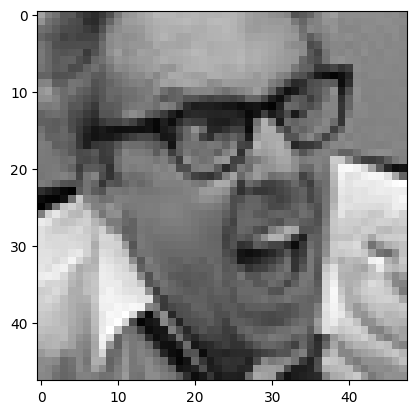

In [4]:
plt.imshow(img)

In [5]:
datadirectory="train/"

In [6]:
classes=["0","1","2","3","4","5","6"]

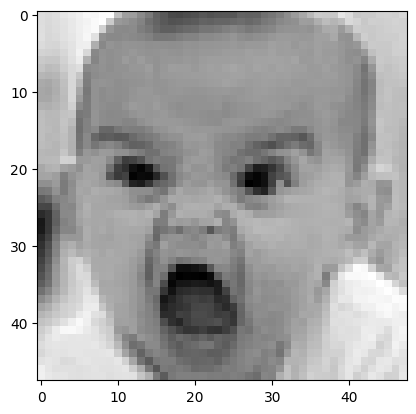

In [7]:
for category in classes:
    path=os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

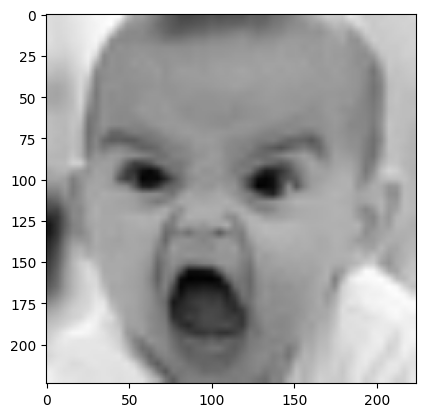

In [8]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

# Read all images and convert into array

In [10]:
training_data=[]

def create_training_data():
    for category in classes:
        path=os.path.join(datadirectory, category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

15104


In [13]:
import random

random.shuffle(training_data)

In [14]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3) #converting into 4d

In [15]:
x.shape

(15104, 224, 224, 3)

In [16]:
x=x/255.0

In [17]:
y=np.array(y)

In [18]:
y.shape

(15104,)

# deep learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
import h5py
model= tf.keras.applications.MobileNetV2()

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

# Transfer learning

In [23]:
base_input=model.layers[0].input

In [24]:
base_output=model.layers[-2].output

In [25]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [26]:
final_output= layers.Dense(128)(base_output)
final_ouput= layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_ouput)
final_ouput=layers.Activation('relu')(final_output)
final_output= layers.Dense(7,activation= 'softmax')(final_output)

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model= keras.Model(inputs= base_input, outputs=final_output)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics= ["accuracy"])

In [31]:
new_model.fit(x,y, epochs=25)

Epoch 1/25
472/472 [==============================] - 1210s 3s/step - loss: 1.3464 - accuracy: 0.4913
Epoch 2/25
472/472 [==============================] - 1196s 3s/step - loss: 1.1385 - accuracy: 0.5716
Epoch 3/25
472/472 [==============================] - 1196s 3s/step - loss: 1.0551 - accuracy: 0.6079
Epoch 4/25
472/472 [==============================] - 1174s 2s/step - loss: 0.9775 - accuracy: 0.6410
Epoch 5/25
472/472 [==============================] - 1155s 2s/step - loss: 0.9234 - accuracy: 0.6571
Epoch 6/25
472/472 [==============================] - 1152s 2s/step - loss: 0.8740 - accuracy: 0.6761
Epoch 7/25
472/472 [==============================] - 1142s 2s/step - loss: 0.8187 - accuracy: 0.6998
Epoch 8/25
472/472 [==============================] - 1142s 2s/step - loss: 0.7631 - accuracy: 0.7221
Epoch 9/25
472/472 [==============================] - 1146s 2s/step - loss: 0.7066 - accuracy: 0.7421
Epoch 10/25
472/472 [==============================] - 1150s 2s/step - loss: 0.643

In [32]:
new_model.save('firstmodel.h5')

C:\Users\karti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
new_model=tf.keras.models.load_model('firstmodel.h5')

In [38]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        